"Stroke Prediction Dataset".

- Dataset ini berisi parameter kesehatan pasien yang digunakan untuk memprediksi apakah seorang pasien memiliki kemungkinan terkena penyakit stroke atau tidak.

- Sumber Data: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

- Tujuan: Melakukan klasifikasi untuk mendeteksi risiko stroke berdasarkan riwayat kesehatan dan gaya hidup.

- Dimensi Data: Terdiri dari 5.110 baris (sampel pasien) dan 12 kolom (fitur).

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Load dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

Exploratory Data Analysis (EDA)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [62]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [64]:
df = df.drop(columns=['id'])

In [65]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [66]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


/tmp/ipython-input-711025319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='viridis')


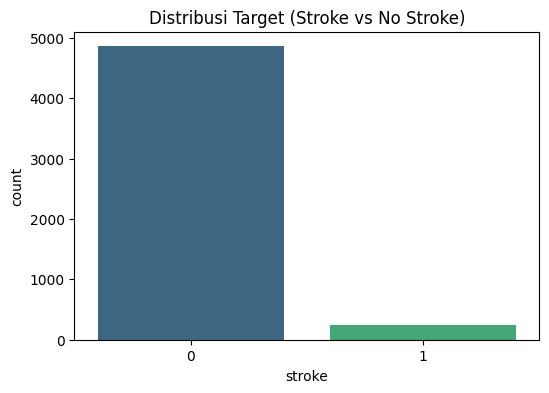

In [67]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, palette='viridis')
plt.title('Distribusi Target (Stroke vs No Stroke)')
plt.show()

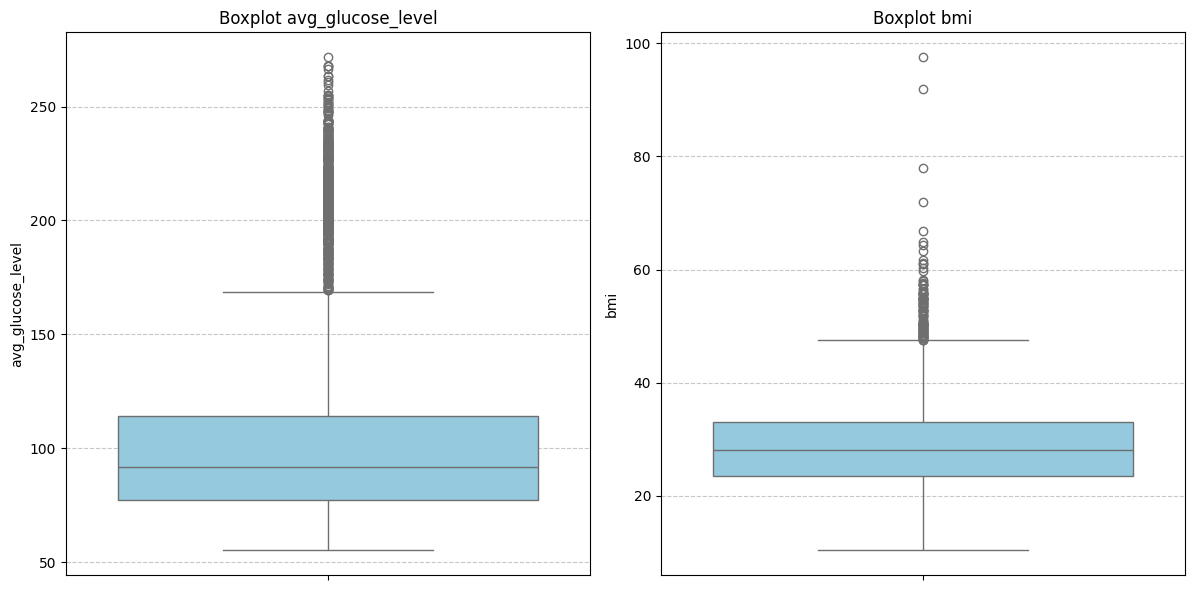

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan fitur numerik yang ingin dicek
numeric_features = ['avg_glucose_level', 'bmi']

# Membuat kanvas untuk 3 grafik bersampingan
plt.figure(figsize=(18, 6))

for i, col in enumerate(numeric_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

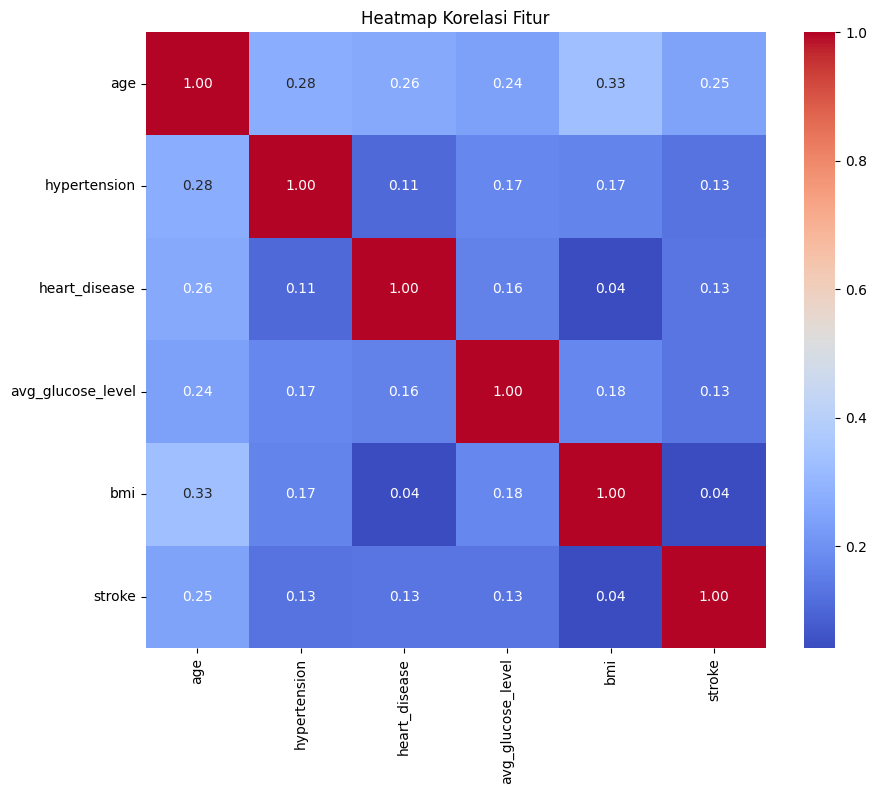

In [69]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur')
plt.show()

Preprocessing

In [70]:
# Mengisi nilai kosong pada kolom bmi dengan nilai Median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Cek kembali apakah masih ada data yang kosong
print("Jumlah Missing Values setelah Imputasi:")
print(df.isnull().sum())

Jumlah Missing Values setelah Imputasi:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [71]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# List kolom yang bertipe objek (teks)
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Melakukan perulangan untuk mengubah setiap kolom teks menjadi angka
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Tampilkan 5 data teratas untuk melihat perubahannya
print("Data setelah Encoding:")
print(df.head())

Data setelah Encoding:
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  


In [72]:
# Fungsi IQR untuk menangani outlier
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Membatasi nilai agar tidak melewati batas bawah dan atas
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Terapkan hanya pada kolom yang ada outlier-nya di boxplot tadi
df = handle_outliers(df, 'bmi')
df = handle_outliers(df, 'avg_glucose_level')

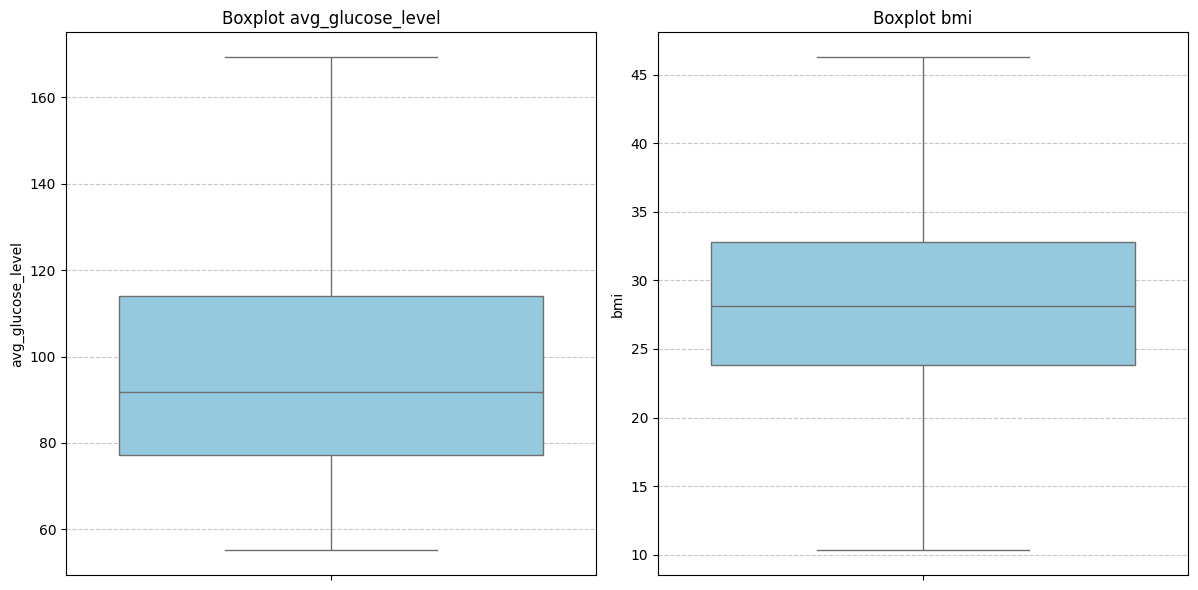

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan fitur numerik yang ingin dicek
numeric_features = ['avg_glucose_level', 'bmi']

# Membuat kanvas untuk 3 grafik bersampingan
plt.figure(figsize=(18, 6))

for i, col in enumerate(numeric_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Kita scale kolom numerik utama
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

print("Data setelah Scaling (Siap masuk ke Model):")
print(df.head())

Data setelah Scaling (Siap masuk ke Model):
   gender       age  hypertension  heart_disease  ever_married  work_type  \
0       1  1.051434             0              1             1          2   
1       0  0.786070             0              0             1          3   
2       1  1.626390             0              1             1          2   
3       0  0.255342             0              0             1          2   
4       0  1.582163             1              0             1          3   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0               1           2.058363  1.110872               1       1  
1               0           2.058363 -0.082921               2       1  
2               0           0.148256  0.535043               2       1  
3               1           2.058363  0.801890               3       1  
4               0           2.058363 -0.658751               2       1  


Splitting Data

In [75]:
from sklearn.model_selection import train_test_split

# 1. Memisahkan Fitur dan Target
X = df.drop(columns=['stroke'])
y = df['stroke']

# 2. Membagi data (80% Train, 20% Test)
# Gunakan stratify=y agar proporsi kelas stroke tetap sama di kedua bagian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data sebelum SMOTE:")
print(y_train.value_counts())

Jumlah data sebelum SMOTE:
stroke
0    3889
1     199
Name: count, dtype: int64


In [76]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan balancing HANYA pada data training
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nJumlah data setelah SMOTE pada X_train:")
print(y_train_res.value_counts())


Jumlah data setelah SMOTE pada X_train:
stroke
0    3889
1    3889
Name: count, dtype: int64


Modelling

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

# 1. List Algoritma
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression()
}

# 2. Loop untuk Melatih dan Menghitung Skor
results = []
for name, model in models.items():
    model.fit(X_train_res, y_train_res) # Melatih dengan data SMOTE
    y_pred = model.predict(X_test)     # Prediksi data Test

    results.append({
        "Algoritma": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (Stroke)": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# 3. Tampilkan Perbandingan
import pandas as pd
df_hasil = pd.DataFrame(results)
print(df_hasil)

             Algoritma  Accuracy  Recall (Stroke)  F1-Score
0                  KNN  0.796477             0.44  0.174603
1        Random Forest  0.884540             0.18  0.132353
2  Logistic Regression  0.760274             0.78  0.241486


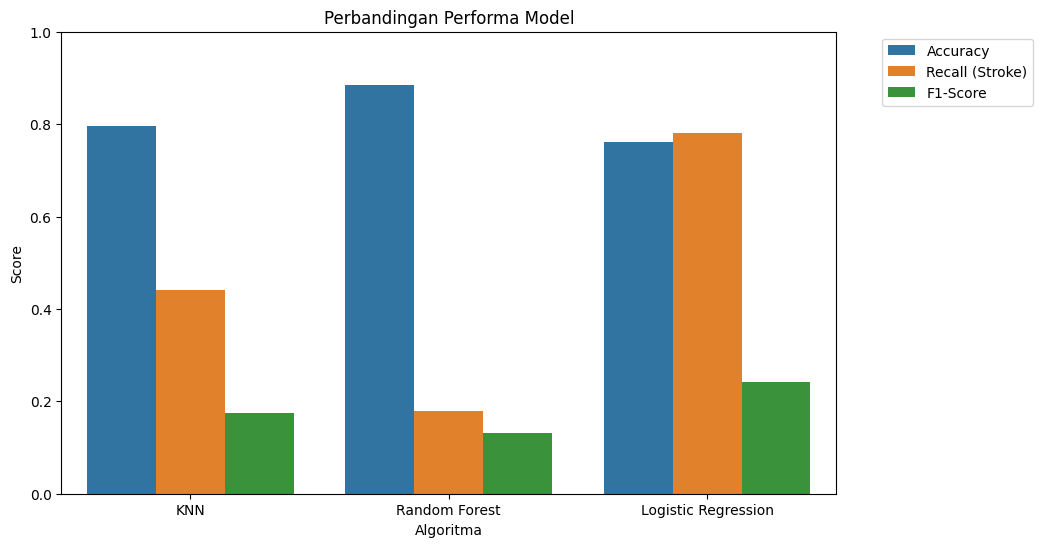

In [78]:
# Mengubah bentuk data agar mudah di-plot
df_melted = df_hasil.melt(id_vars='Algoritma', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Algoritma', y='Score', hue='Metric')
plt.title('Perbandingan Performa Model')
plt.ylim(0, 1) # Skala 0 sampai 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

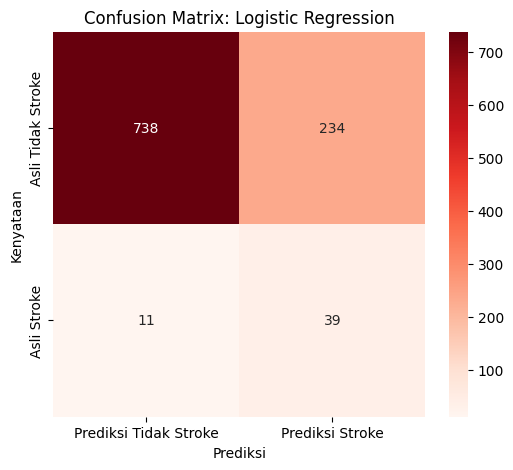

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ambil model Logistic Regression yang sudah dilatih
best_model = models["Logistic Regression"]
best_model.fit(X_train_res, y_train_res)
y_pred_best = best_model.predict(X_test)

# Buat Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Prediksi Tidak Stroke', 'Prediksi Stroke'],
            yticklabels=['Asli Tidak Stroke', 'Asli Stroke'])
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('Kenyataan')
plt.xlabel('Prediksi')
plt.show()